<h1><span style="color: #6495ED;">Air Quality Prediction</span></h1>

<h2><span style="color: #6495ED;">Data Preparation</span></h2>

Prepared by Lipsita Tripathy

Email: lipsitalt@gmail.com

December 2023

## Introduction
Welcome to the series of Jupyter Notebooks dedicated to our project on "Delhi Air Quality Prediction." This comprehensive project aims to develop a robust predictive model for forecasting the air quality index (AQI) in Delhi, a city known for its challenging air pollution levels. Through these notebooks, we will journey through the various stages of the project, encompassing data preparation, exploratory data analysis (EDA), baseline and advanced modeling.

## Data Dictionary
The project utilizes air quality data extracted from 20 stations in Delhi for the years 2018 and 2019. The dataset comprises 12 features with instances recorded at each station.
| **Features**              | **Description**                                             | **Type**   |
|---------------------------|-------------------------------------------------------------|------------|
| Datetime                  | Timestamp indicating the date and time of the recorded data | -          |
| StationId                 | Unique identifier for each monitoring station               | Numeric    |
| PM2.5 (ug/m3)             | Particulate Matter with a diameter of 2.5 microns or less   | Numeric    |
| PM10 (ug/m3)              | Particulate Matter with a diameter of 10 microns or less   | Numeric    |
| NO (ug/m3)                | Nitric Oxide concentration                                  | Numeric    |
| NO2 (ug/m3)               | Nitrogen Dioxide concentration                               | Numeric    |
| NOx (ug/m3)               | Sum of Nitric Oxide and Nitrogen Dioxide concentrations     | Numeric    |
| NH3 (ug/m3)               | Ammonia concentration                                       | Numeric    |
| SO2 (ug/m3)               | Sulfur Dioxide concentration                                | Numeric    |
| CO (ug/m3)                | Carbon Monoxide concentration                               | Numeric    |
| Ozone (ug/m3)             | Ozone concentration                                         | Numeric    |
| Benzene (ug/m3)           | Concentration of Benzene in the air                          | Numeric    |
| Toluene (ug/m3)           | Concentration of Toluene in the air                          | Numeric    |
| Xylene (ug/m3)            | Concentration of Xylene in the air                            | Numeric    |
| RH (%)                    | Relative Humidity in percentage                             | Numeric    |
| WS (m/s)                  | Wind Speed in meters per second                              | Numeric    |
| WD (degree)               | Wind Direction in degrees                                   | Numeric    |
| BP (mmHg)                 | Barometric Pressure in millimeters of mercury               | Numeric    |
| AT (degree C)             | Ambient Temperature in degrees Celsius                      | Numeric    |
| RF (mm)                   | Rainfall in millimeters                                     | Numeric    |
| SR (W/mt2)                | Solar Radiation in Watts per square meter                    | Numeric    |


| **Target**              | **Description**                                             | **Type**   |
|---------------------------|-------------------------------------------------------------|------------|
| <span style="color: #FF0000;">y_AQI</span>| Target variable representing the predicted Air Quality Index for next 24 hours| Numeric    |

| <h2><span style="color: #FF6F61;">Table of Contents</span></h2> |
|----------------------------------------------|
| Data Preparation                                    |
| Merge Similar Columns                               |
Correlation Analysis with Original Features| Identifying and Removing Outliers                   |
| Missing Values Imputation(4 Unique Steps)           |

*************************************************************************************

## Data Preparation

*************************************************************************************

* data_preparation.ipynb

### Importing Necessary Libraries

In [83]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aqi_engine import calculate_aqi, fill_missing_with_average
import warnings

Let's load and concatenate hourly air quality data from multiple stations in Delhi. The data is sourced from multiple CSV files located in a specified folder.

- First, we create a variable folder_path pointing to the directory with raw data files.
- Retrieve files starting with "DL" and having the ".csv" extension.
- Next, we initialize an empty DataFrame (data_df) and append data from each file. We create the 'StationId' column based on the filename.
- Then we store the final dataset in the dataframe named df.
- Finally to ensure memory efficiency, we delete unnecessary variables.

In [84]:
# The raw data folder path
folder_path = "data/delhi_all_stations_hourly_2010_2023/"

# Get all files in the folder that start with "DL" (represents Delhi) and have the extension ".csv"
file_names = [file for file in os.listdir(folder_path) if file.startswith("DL") and file.endswith(".csv")]
# file_names = ["DL022", "DL038", "DL035", "DL024", "DL033", "DL007", "DL023", "DL031", "DL036", "DL014", "DL037", "DL040", "DL029", "DL039", "DL025", "DL019", "DL034", "DL028", "DL011", "DL016", "DL030", "DL004", "DL021", "DL026", "DL027"]

# Initialize an empty DataFrame
data_df = [] # pd.DataFrame()

# Loop through the file names and append the data to the DataFrame
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    # Read the CSV and create the StationId column with the filename
    data = pd.read_csv(file_path)
    # Strip out the file extension ".csv" from file_name before updating "StationId" column
    data['StationId'] = os.path.splitext(file_name)[0]
    data_df.append(data)

df = pd.concat(data_df)

# delete unnecessary variables
del data
del data_df
del file_name
del file_names
del file_path
del folder_path

# sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2796171 entries, 0 to 20841
Data columns (total 60 columns):
 #   Column               Dtype  
---  ------               -----  
 0   From Date            object 
 1   To Date              object 
 2   PM2.5 (ug/m3)        float64
 3   PM10 (ug/m3)         float64
 4   NO (ug/m3)           float64
 5   NO2 (ug/m3)          float64
 6   NOx (ppb)            float64
 7   NH3 (ug/m3)          float64
 8   SO2 (ug/m3)          float64
 9   CO (mg/m3)           float64
 10  Ozone (ug/m3)        float64
 11  Benzene (ug/m3)      float64
 12  StationId            object 
 13  Toluene (ug/m3)      float64
 14  Eth-Benzene (ug/m3)  float64
 15  MP-Xylene (ug/m3)    float64
 16  O Xylene (ug/m3)     float64
 17  Temp (degree C)      float64
 18  RH (%)               float64
 19  WS (m/s)             float64
 20  WD (deg)             float64
 21  SR (W/mt2)           float64
 22  BP (mmHg)            float64
 23  VWS (m/s)            float64
 24  Xylen

### Datetime Transformation
- First, we drop the "To Date" column from the DataFrame (df) as it is not required for our analysis.
- Next, we rename the "From Date" column to "Datetime" for clarity and consistency in the dataset.
- Finally, we convert the "Datetime" column to the datetime datatype for better compatibility and accurate time-based operations.

In [85]:
# Drop "To Date" column
df = df.drop(columns='To Date')
# Rename "From Date" as "Datetime"
df = df.rename(columns={'From Date': 'Datetime'})
# Convert "Datetime" as datetime datatype
df['Datetime'] = pd.to_datetime(df['Datetime'])

### Removing 'StationId' column
- For the purpose of our analysis, we have removed the "StationId" column from the dataset as it is not pertinent to our current objectives. 
- Additionally, we have **aggregated the data based on "Datetime" by calculating the mean for each group**. This step simplifies our analysis, allowing us to focus on relevant information without considering individual station identifiers.

In [86]:
# Drop "StationId" column
df.drop("StationId", axis=1, inplace=True)

df = df.groupby("Datetime").mean().reset_index()

### Data Sorting

To ensure a well-ordered dataset for our analysis, we have sorted the DataFrame based on the "Datetime" column. This arrangement allows for a structured and chronological representation of the data. Additionally, we have reset the index to maintain a clean and sequential index order.

In [87]:
# Sort the DataFrame by "Datetime"
df = df.sort_values(by="Datetime")

# Reset the index
df.reset_index(drop=True, inplace=True)

### Temporal Data Filtering

I focused on the last 10 years of data (2013-2023) by filtering records from November 28, 2012, onward. This ensures our analysis uses the most recent and relevant data. Choosing this date prevents null values in the beginning of 2013 when calculating moving averages, making our analysis more reliable.

In [88]:
# We are dealing with last 10 years data. Let's filter records created on or after 2012-11-28
df = df[df['Datetime'] >= '2012-11-28']

# Reset the index
df = df.reset_index(drop=True)

# sanity check 
df.head()

,Datetime,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),...,Benzene (),SR (),Temp (ug/m3),WD (),SO2 (),RH (),BP (),Eth-Benzene (),Xylene (),CH4 ()
0,2012-11-28 00:00:00,202.611667,NaN,230.932000,238.090,350.613333,84.7925,11.021250,5.645000,5.956667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-11-28 01:00:00,194.000000,NaN,190.858000,209.434,343.817500,89.8100,12.008750,8.806667,6.536667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-11-28 02:00:00,192.430000,NaN,153.780000,182.996,270.627500,96.4275,14.233750,6.835000,7.170000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-11-28 03:00:00,212.041667,NaN,118.818000,181.038,236.955000,90.4950,28.621250,4.465000,6.672857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-11-28 04:00:00,192.778333,NaN,103.151667,134.440,163.536000,78.1475,21.048889,9.974000,6.242500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check for Missing Values

Let's examine the presence of missing values in our DataFrame (`df`). The following code snippet displays the count of missing values for each column:

In [89]:
df.isna().sum()

Datetime                   0
PM2.5 (ug/m3)            180
PM10 (ug/m3)            5179
NO (ug/m3)                30
NO2 (ug/m3)               53
NOx (ppb)                 35
NH3 (ug/m3)             2343
SO2 (ug/m3)               58
CO (mg/m3)               488
Ozone (ug/m3)             59
Benzene (ug/m3)          113
Toluene (ug/m3)          133
Eth-Benzene (ug/m3)     6100
MP-Xylene (ug/m3)       6549
O Xylene (ug/m3)        7426
Temp (degree C)          335
RH (%)                    45
WS (m/s)                  48
WD (deg)                 131
SR (W/mt2)                51
BP (mmHg)                 45
VWS (m/s)              18716
Xylene (ug/m3)         22510
AT (degree C)          18874
MP-Xylene ()           61453
RF (mm)                38452
AT ()                  49302
WD (degree)            11655
CH4 (ug/m3)            44721
NMHC (ug/m3)           90624
THC (ug/m3)            42447
Gust (km/hr)           90624
Variance (n)           90624
Power (W)              90624
CO2 (mg/m3)   

#### Verify Missing Hourly Records in Every Station
* We first create a reference date range with hourly intervals and then check for missing dates in each station's records.
* Stations with missing records are identified and printed for further inspection. This step is crucial for ensuring data integrity and identifying potential gaps in the hourly records.

In [90]:
# VERIFY MISSING HOURLY RECORD
#========================================================================
# Generate a reference date range with hourly intervals
reference_range = pd.date_range(start=df['Datetime'].min(), end=df['Datetime'].max(), freq='H')

# Find missing records
missing_records = reference_range.difference(df['Datetime'])

# Filter out stations with no missing records
stations_with_missing_records = df[df['Datetime'].isin(missing_records)]

# Print result to check for any missing dates
print(stations_with_missing_records)

del reference_range
del missing_records
del stations_with_missing_records

Empty DataFrame
Columns: [Datetime, PM2.5 (ug/m3), PM10 (ug/m3), NO (ug/m3), NO2 (ug/m3), NOx (ppb), NH3 (ug/m3), SO2 (ug/m3), CO (mg/m3), Ozone (ug/m3), Benzene (ug/m3), Toluene (ug/m3), Eth-Benzene (ug/m3), MP-Xylene (ug/m3), O Xylene (ug/m3), Temp (degree C), RH (%), WS (m/s), WD (deg), SR (W/mt2), BP (mmHg), VWS (m/s), Xylene (ug/m3), AT (degree C), MP-Xylene (), RF (mm), AT (), WD (degree), CH4 (ug/m3), NMHC (ug/m3), THC (ug/m3), Gust (km/hr), Variance (n), Power (W), CO2 (mg/m3), Ozone (ppb), Gust (kl/h), Gust (m/s), WS (), SPM (ug/m3), MH (m), HCHO (ug/m3), Hg (ug/m3), CO (ug/m3), Toluene (), CO (ng/m3), NOx (ug/m3), WD (degree C), Benzene (), SR (), Temp (ug/m3), WD (), SO2 (), RH (), BP (), Eth-Benzene (), Xylene (), CH4 ()]
Index: []

[0 rows x 58 columns]


#### Merge Similar Columns and Handle Missing Values

In the dataset, there are several columns that represent similar measurements but are labeled differently. To simplify the data and ensure consistency, the following code snippet merges these similar columns and handles missing values in those respective columns.

Here we teratively combine similar columns into new columns and fills missing values using the combine_first method. Duplicate columns are then dropped, resulting in a more consolidated and consistent dataset.

In [91]:
# Define a mapping of new columns to their corresponding similar old columns
column_mapping = {
    "CO (ug/m3)":        ["CO (mg/m3)", "CO (ng/m3)"],
    "Xylene (ug/m3)":    ["Xylene ()", "MP-Xylene (ug/m3)"],
    "MP-Xylene (ug/m3)": ["MP-Xylene ()"],
    "Benzene (ug/m3)":   ["Benzene ()"],
    "Toluene (ug/m3)":   ["Toluene ()"],
    "SO2 (ug/m3)":       ["SO2 ()"],
    "NOx (ug/m3)":       ["NOx (ppb)"],
    "Ozone (ug/m3)":     ["Ozone (ppb)"],
    "AT (degree C)":     ["AT ()", "Temp (degree C)"],
    "WD (degree)":       ["WD (degree C)", "WD (deg)", "WD ()"],
    "WS (m/s)":          ["WS ()"]
}

# Fill missing values in the new column using combine_first
for new_column, old_columns in column_mapping.items():
    for old_column in old_columns:
        df[new_column] = df[new_column].combine_first(df[old_column])

# Drop duplicate columns
df = df.drop(columns=sum(column_mapping.values(), []))

del column_mapping
del new_column
del old_column
del old_columns

#### Drop Columns with More Than 50% Missing Records

* In the data cleaning process, it's common to remove columns with a high percentage of missing values as they may not contribute significantly to the analysis.
* We first calculate the percentage of missing values for each column, identifying columns with 50% or more missing values, print the list of such columns for reference, and finally drop these columns from the DataFrame. 
* In this specific case, it turns out that these columns were not going to be kept anyway, which aligns with the decision to drop them due to a high percentage of missing records. This step helps streamline the dataset and focus on the most relevant features.

In [92]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Select columns with 50% or more missing values
columns_with_50_percent_missing = missing_percentage[missing_percentage >= 50].index.tolist()

print(columns_with_50_percent_missing)

# Drop columns with 50% or more missing values
df = df.drop(columns=columns_with_50_percent_missing)

# Select other columns with higher missing records
other_columns_with_higher_missing_records = ['Eth-Benzene (ug/m3)', 'VWS (m/s)', 'O Xylene (ug/m3)', 'CH4 (ug/m3)', 'THC (ug/m3)']
df = df.drop(columns=other_columns_with_higher_missing_records)

del missing_percentage
del columns_with_50_percent_missing
del other_columns_with_higher_missing_records

['NMHC (ug/m3)', 'Gust (km/hr)', 'Variance (n)', 'Power (W)', 'CO2 (mg/m3)', 'Gust (kl/h)', 'Gust (m/s)', 'SPM (ug/m3)', 'MH (m)', 'HCHO (ug/m3)', 'Hg (ug/m3)', 'SR ()', 'Temp (ug/m3)', 'RH ()', 'BP ()', 'Eth-Benzene ()', 'CH4 ()']


In [93]:
df.head()

,Datetime,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NH3 (ug/m3),SO2 (ug/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),RH (%),WS (m/s),SR (W/mt2),BP (mmHg),Xylene (ug/m3),AT (degree C),RF (mm),WD (degree),CO (ug/m3),NOx (ug/m3)
0,2012-11-28 00:00:00,202.611667,NaN,230.932000,238.090,84.7925,11.021250,5.956667,16.045000,81.986667,58.237143,0.323333,69.714286,877.170000,18.153333,11.1550,NaN,155.90,5.645000,350.613333
1,2012-11-28 01:00:00,194.000000,NaN,190.858000,209.434,89.8100,12.008750,6.536667,14.673333,78.525000,59.962857,0.356667,69.718571,852.131429,15.536667,10.5775,NaN,100.21,8.806667,343.817500
2,2012-11-28 02:00:00,192.430000,NaN,153.780000,182.996,96.4275,14.233750,7.170000,11.203333,63.360000,59.664286,0.360000,76.097143,852.057143,12.560000,10.3900,NaN,161.08,6.835000,270.627500
3,2012-11-28 03:00:00,212.041667,NaN,118.818000,181.038,90.4950,28.621250,6.672857,9.705000,52.036667,51.830000,0.368333,70.944286,852.728571,10.063333,10.2050,NaN,178.21,4.465000,236.955000
4,2012-11-28 04:00:00,192.778333,NaN,103.151667,134.440,78.1475,21.048889,6.242500,8.640000,44.168333,53.070000,0.455714,68.554286,852.050000,8.296667,10.0950,NaN,112.52,9.974000,163.536000


### Correlation Analysis with Original Features
A correlation matrix helps us see how much variables are related to each other.

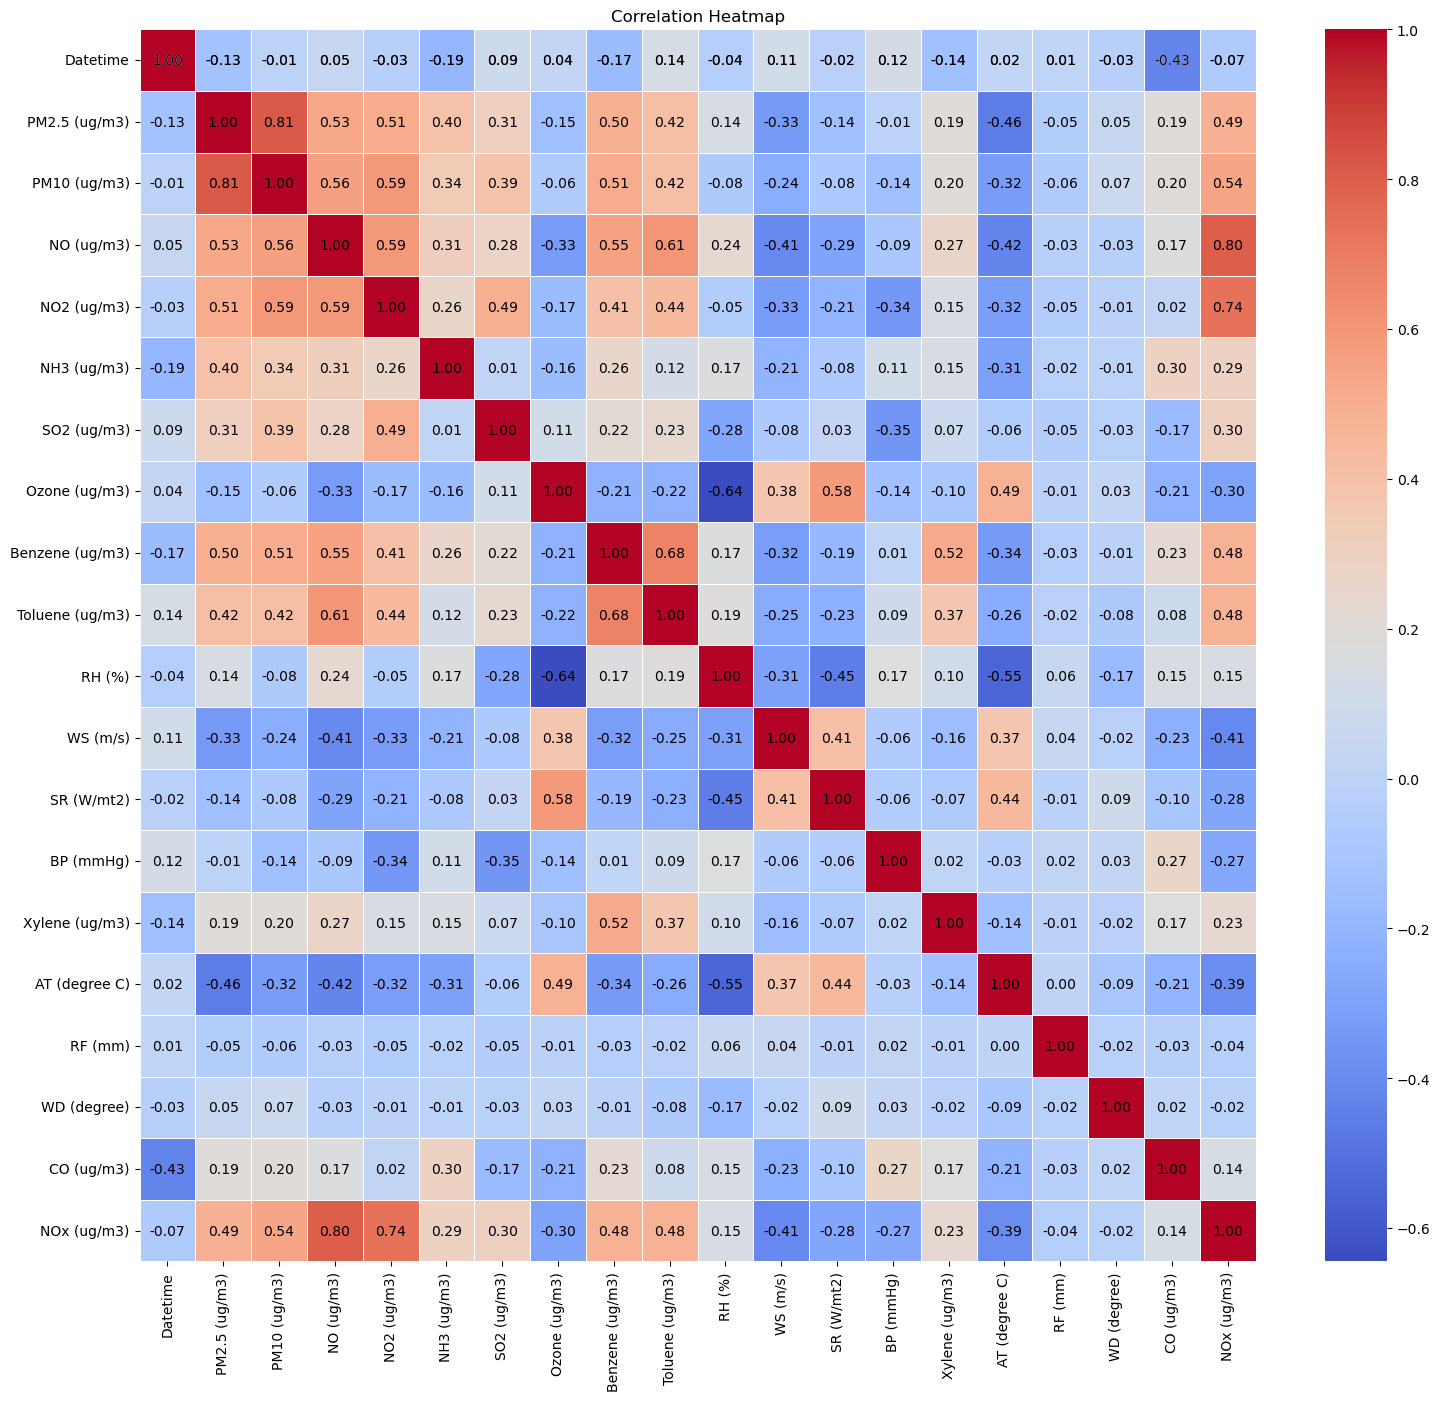

In [94]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 16))

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)

# Manually annotate the values
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center')

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

### Finding

- This plot displays features that have strong correlations, such as NOx being highly correlated with NO and NO2. We can keep NOx and remove NO and NO2.

- Likewise, Benzene and Toluene exhibit a strong correlation with each other. Simultaneously, they also show a relatively high correlation with all other particulate matters.

So, let's remove 'NO (ug/m3)', 'NO2 (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)' from the dataset.

In [95]:
# Remove columns with high correlation
df = df.drop(['NO (ug/m3)', 'NO2 (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)'], axis=1)

In [96]:
df.head()

,Datetime,PM2.5 (ug/m3),PM10 (ug/m3),NH3 (ug/m3),SO2 (ug/m3),Ozone (ug/m3),RH (%),WS (m/s),SR (W/mt2),BP (mmHg),Xylene (ug/m3),AT (degree C),RF (mm),WD (degree),CO (ug/m3),NOx (ug/m3)
0,2012-11-28 00:00:00,202.611667,NaN,84.7925,11.021250,5.956667,58.237143,0.323333,69.714286,877.170000,18.153333,11.1550,NaN,155.90,5.645000,350.613333
1,2012-11-28 01:00:00,194.000000,NaN,89.8100,12.008750,6.536667,59.962857,0.356667,69.718571,852.131429,15.536667,10.5775,NaN,100.21,8.806667,343.817500
2,2012-11-28 02:00:00,192.430000,NaN,96.4275,14.233750,7.170000,59.664286,0.360000,76.097143,852.057143,12.560000,10.3900,NaN,161.08,6.835000,270.627500
3,2012-11-28 03:00:00,212.041667,NaN,90.4950,28.621250,6.672857,51.830000,0.368333,70.944286,852.728571,10.063333,10.2050,NaN,178.21,4.465000,236.955000
4,2012-11-28 04:00:00,192.778333,NaN,78.1475,21.048889,6.242500,53.070000,0.455714,68.554286,852.050000,8.296667,10.0950,NaN,112.52,9.974000,163.536000


### Pollutant Distribution Histograms
- We focus on a subset of columns related to pollutants, including PM2.5, PM10, NOx, NH3, SO2, CO, Ozone, Xylene, RH, WS, WD, BP, AT, RF, and SR.
- We create histograms for each selected pollutant column. The subplot grid adapts dynamically based on the number of selected pollutant columns.
- Mean and median lines are added to each histogram for additional insights.
- Next we remove the empty subplots to ensure a clean presentation.
- Finally we display the resulting histograms in a well-organized grid, providing a quick overview of the distribution of pollutants in our dataset.

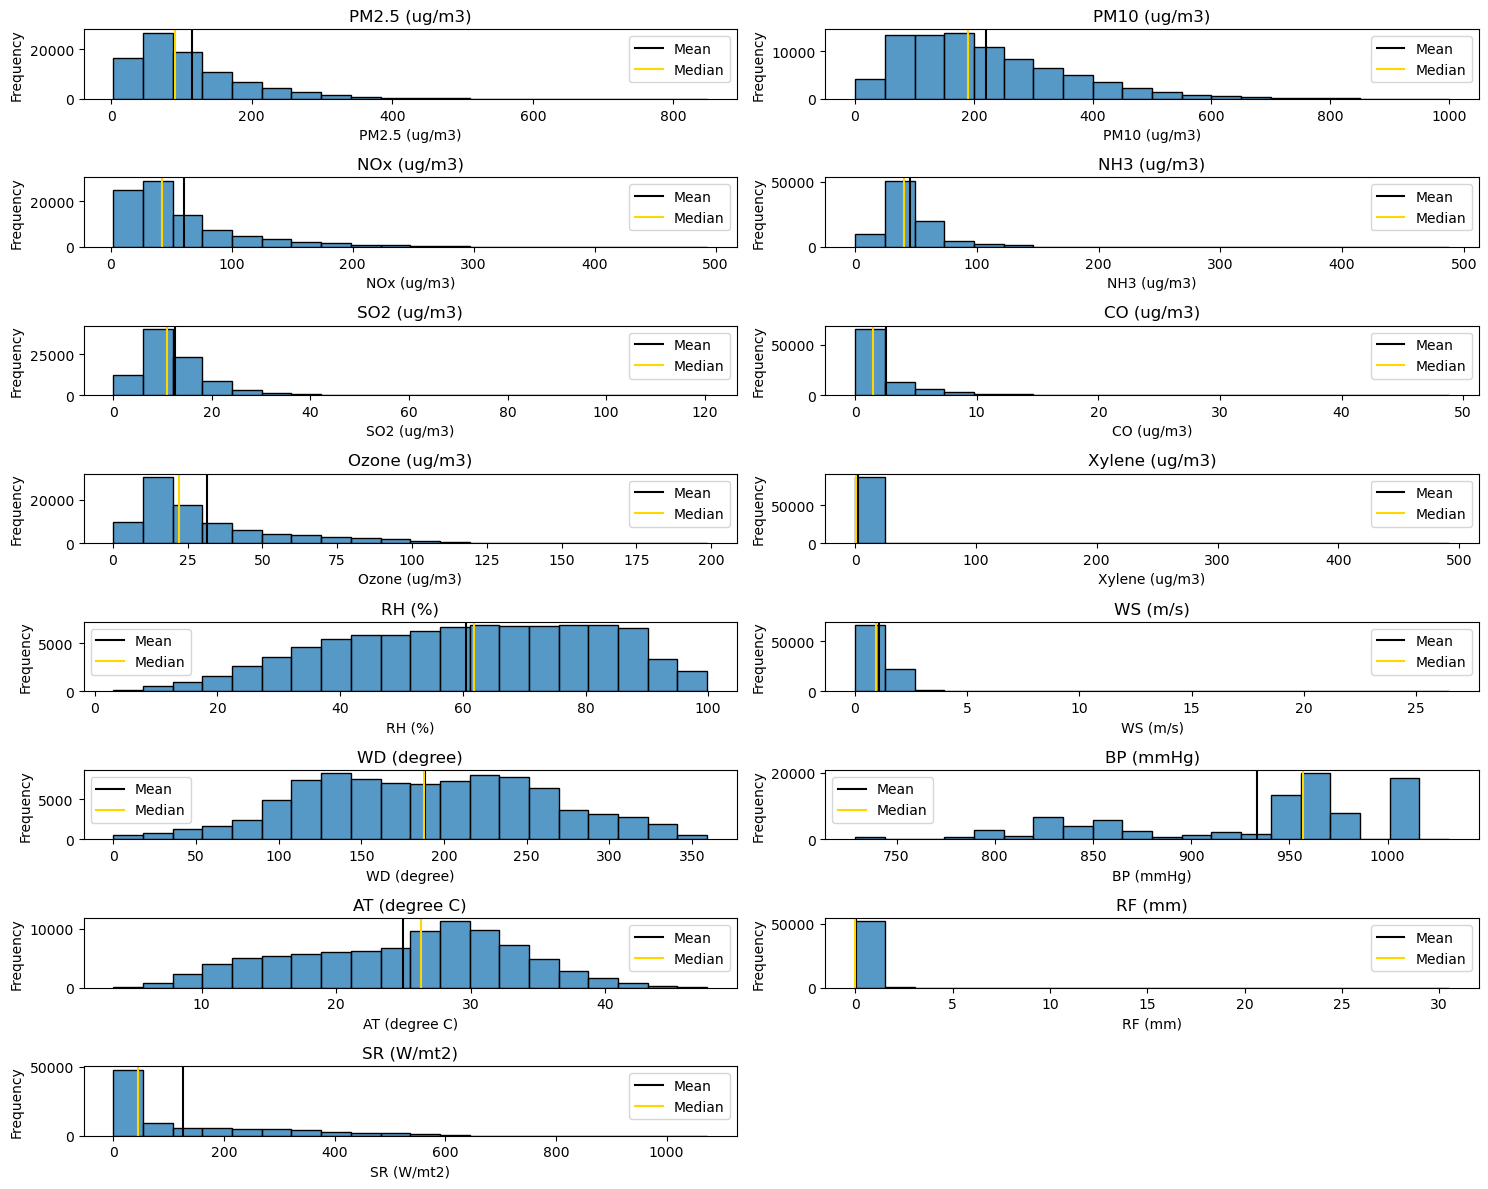

In [97]:
# Histograms: Distribution of Pollutants
selected_columns = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NOx (ug/m3)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (ug/m3)', 'Ozone (ug/m3)', 'Xylene (ug/m3)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'BP (mmHg)', 'AT (degree C)', 'RF (mm)', 'SR (W/mt2)']

# Calculate the number of rows needed based on the number of selected columns
num_cols = 2
num_rows = len(selected_columns) // num_cols + (len(selected_columns) % num_cols > 0)

# Decreased height of each chart
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 1.5 * num_rows))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Iterate through selected columns and plot histograms
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], bins=20, kde=False, ax=axes[i])
    axes[i].set_title(column)

    # Customize x and y label
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

    # Adding mean and median lines
    axes[i].axvline(df[column].mean(), c='black', label='Mean')
    axes[i].axvline(df[column].median(), c='gold', label='Median')
    axes[i].legend()

# Remove empty subplots
for i in range(len(selected_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

## Identifying and Removing Outliers:

Outliers have the potential to disrupt analyses and bias results. These are exceptional values that significantly deviate from the rest of the data. Eliminating the impact of such extreme data points allows for more robust and accurate predictions.

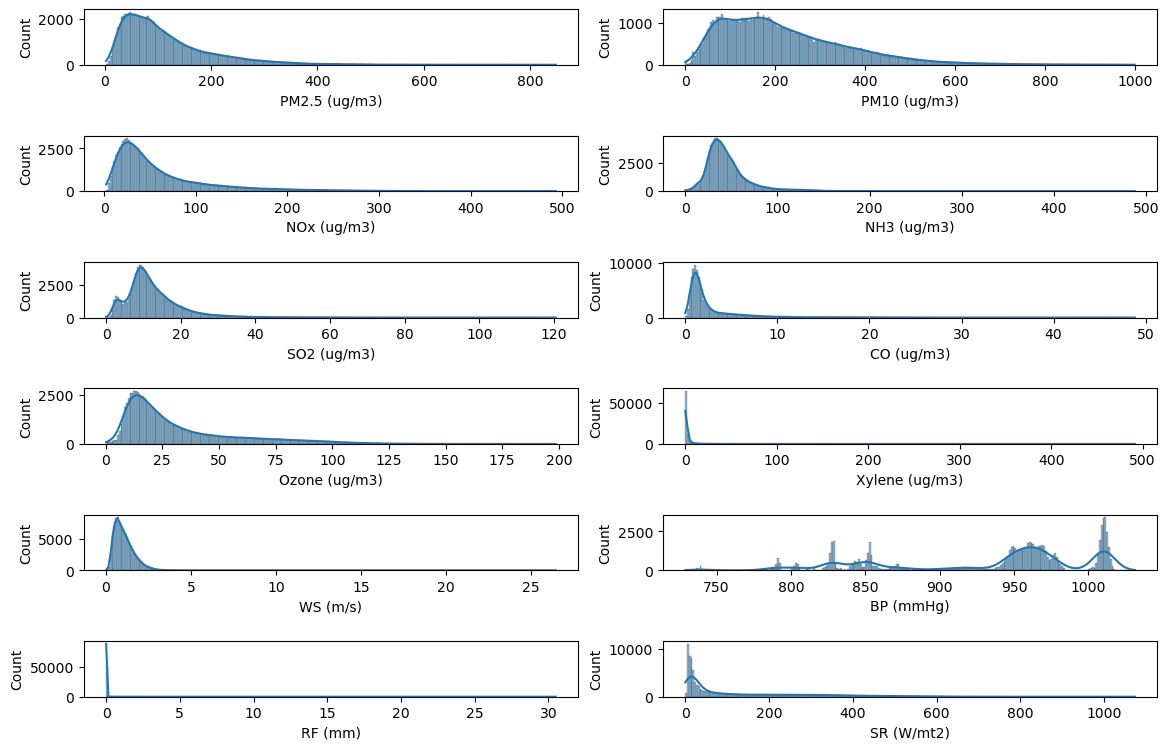

In [98]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plotting histograms
fig, axes = plt.subplots(6, 2, figsize=(12, 8))
fig.tight_layout(pad=3.0)

sns.histplot(data=df['PM2.5 (ug/m3)'], bins=250, kde=True, ax=axes[0,0])
sns.histplot(data=df['PM10 (ug/m3)'], bins=250, kde=True, ax=axes[0,1])
sns.histplot(data=df['NOx (ug/m3)'], bins=250, kde=True, ax=axes[1,0])
sns.histplot(data=df['NH3 (ug/m3)'], bins=250, kde=True, ax=axes[1,1])
sns.histplot(data=df['SO2 (ug/m3)'], bins=250, kde=True, ax=axes[2,0])
sns.histplot(data=df['CO (ug/m3)'], bins=250, kde=True, ax=axes[2,1])
sns.histplot(data=df['Ozone (ug/m3)'], bins=250, kde=True, ax=axes[3,0])
sns.histplot(data=df['Xylene (ug/m3)'], bins=250, kde=True, ax=axes[3,1])
sns.histplot(data=df['WS (m/s)'], bins=250, kde=True, ax=axes[4,0])
sns.histplot(data=df['BP (mmHg)'], bins=250, kde=True, ax=axes[4,1])
sns.histplot(data=df['RF (mm)'], bins=250, kde=True, ax=axes[5,0])
sns.histplot(data=df['SR (W/mt2)'], bins=250, kde=True, ax=axes[5,1])

plt.show()

As we explore the distributions for parameters like "PM2.5 levels," 'PM10 concentrations,' 'NOx emissions,' and others, a noticeable trend emerges – most data points cluster towards the lower values, creating a rightward tilt in the graphs.

To delve deeper into the data, I'm particularly interested in the outer edges of these histograms. Examining the extremities can unveil potential outliers, points that don't conform to the usual pattern. Detecting and understanding these outliers is crucial for a comprehensive analysis.

### Visualizing Outliers for PM2.5
We need to set the "Datetime" to index to plot the concentration ranges over time to detect the outliers.

In [99]:
df_copy = df.copy()

df_copy.set_index('Datetime', inplace=True) # Set 'Datetime' as the index

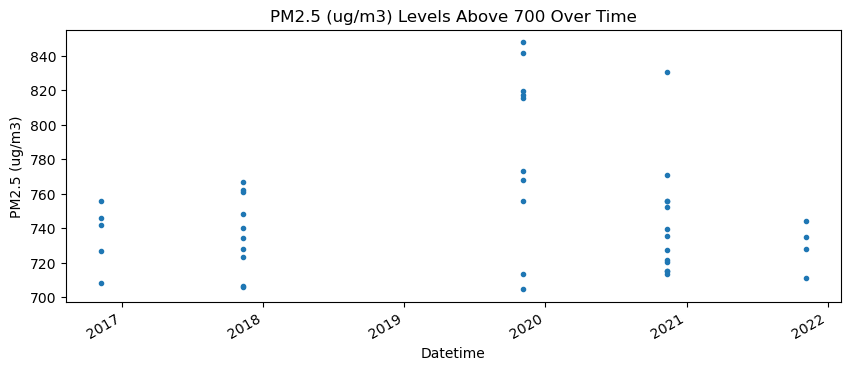

In [100]:
column_name = 'PM2.5 (ug/m3)'
analysis_threshold = '700'

df_copy.query('`' + column_name + '` > ' + analysis_threshold)[column_name].plot(style='.', figsize=(10, 4)).set(
    xlabel='Datetime', ylabel=column_name, title=column_name + ' Levels Above ' + analysis_threshold + ' Over Time'
)
plt.show()

Here, a notable observation is the presence of a few outliers, particularly those surpassing 800, concentrated mainly in the years 2020 and 2021. Proceeding cautiously, I intend to remove these outliers.

### Managing Outliers for "PM2.5"

I've implemented a thresholding method to handle extreme values in the "PM2.5 (ug/m3)" column of our dataset. With a set threshold of 800, my goal is to identify and address concentrations that deviate significantly, potentially indicating outliers that could impact our analysis.

By masking values beyond the threshold, I'm aiming to ensure the reliability of our data for subsequent analyses. Specifically, values exceeding the 800 threshold in the "PM2.5 (ug/m3)" column are replaced with NaN (Not a Number) using the mask method.

In [101]:
threshold = 800
column_to_update = "PM2.5 (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

### Visualizing Outliers for PM10

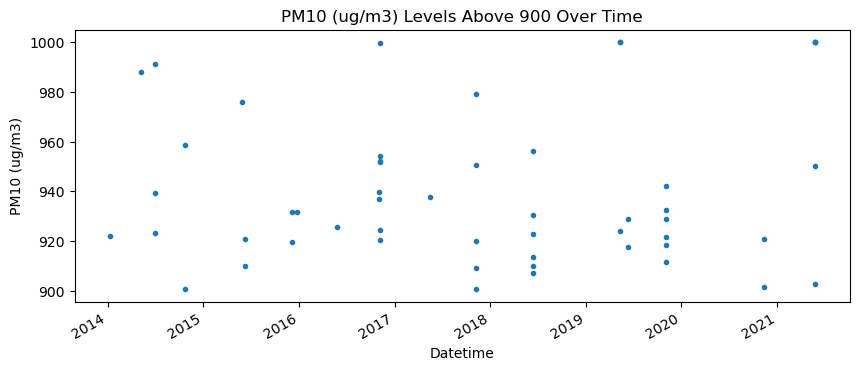

In [102]:
column_name = 'PM10 (ug/m3)'
analysis_threshold = '900'

df_copy.query('`' + column_name + '` > ' + analysis_threshold)[column_name].plot(style='.', figsize=(10, 4)).set(
    xlabel='Datetime', ylabel=column_name, title=column_name + ' Levels Above ' + analysis_threshold + ' Over Time'
)
plt.show()

As you can see, this feature is quite noisy. However I will just trim the extreme part of these measurements.

### Managing Outliers for "PM10" 
I will just trim the extreme part of these measurements that are above 980

In [103]:
threshold = 980
column_to_update = "PM10 (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

### Visualizing Outliers for NOx

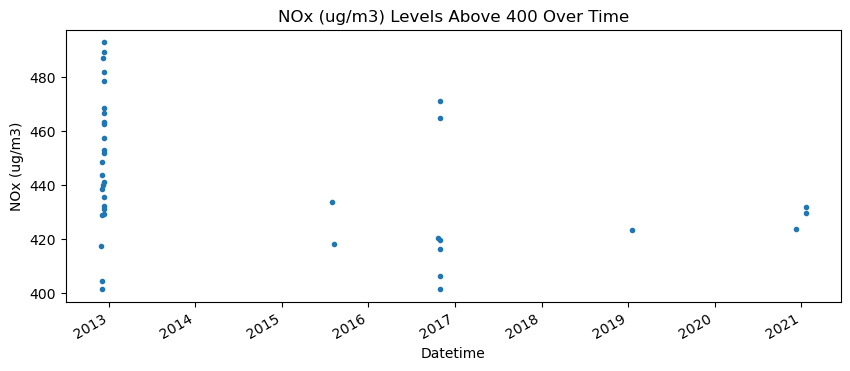

In [53]:
column_name = 'NOx (ug/m3)'
analysis_threshold = '400'

df_copy.query('`' + column_name + '` > ' + analysis_threshold)[column_name].plot(style='.', figsize=(10, 4)).set(
    xlabel='Datetime', ylabel=column_name, title=column_name + ' Levels Above ' + analysis_threshold + ' Over Time'
)
plt.show()

We notice just a few extreme points around years 2013 and 2017. I will eliminate those.

### Managing Outliers for "NOx" 

In [ ]:
threshold = 450
column_to_update = "NOx (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

### Visualizing Outliers for NH3

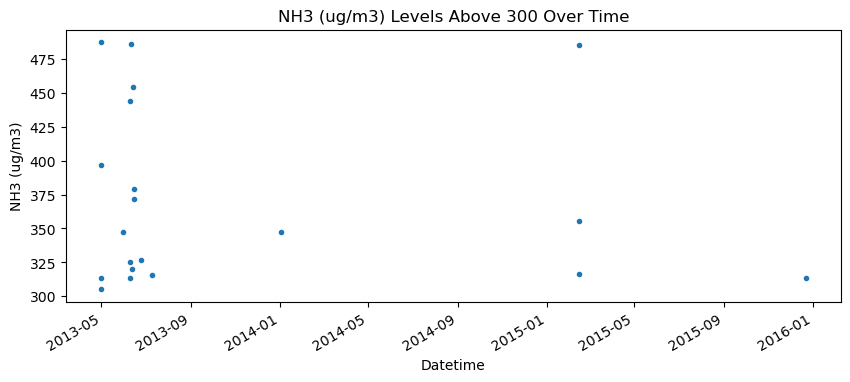

In [105]:
column_name = 'NH3 (ug/m3)'
analysis_threshold = '300'

df_copy.query('`' + column_name + '` > ' + analysis_threshold)[column_name].plot(style='.', figsize=(10, 4)).set(
    xlabel='Datetime', ylabel=column_name, title=column_name + ' Levels Above ' + analysis_threshold + ' Over Time'
)
plt.show()

We notice just a few extreme points that may be error data points. I will eliminate those.

In [106]:
threshold = 400
column_to_update = "NH3 (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

### Visualizing Outliers for SO2

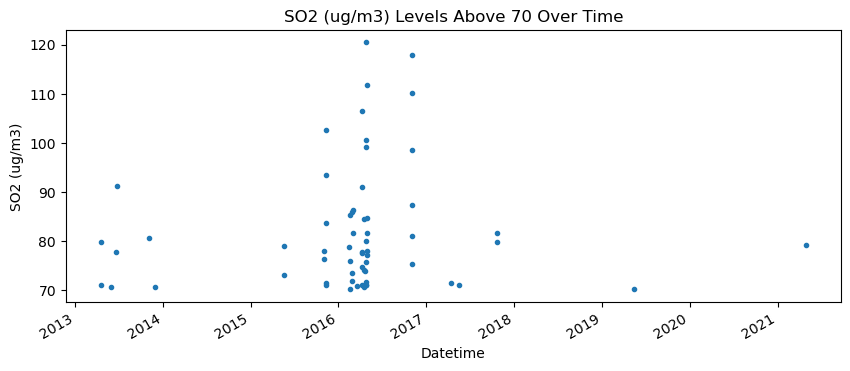

In [109]:
column_name = 'SO2 (ug/m3)'
analysis_threshold = '70'

df_copy.query('`' + column_name + '` > ' + analysis_threshold)[column_name].plot(style='.', figsize=(10, 4)).set(
    xlabel='Datetime', ylabel=column_name, title=column_name + ' Levels Above ' + analysis_threshold + ' Over Time'
)
plt.show()

We notice just a few extreme points that may be error data points. I will eliminate those.

In [ ]:
threshold = 90
column_to_update = "SO2 (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

### Visualizing Outliers for CO

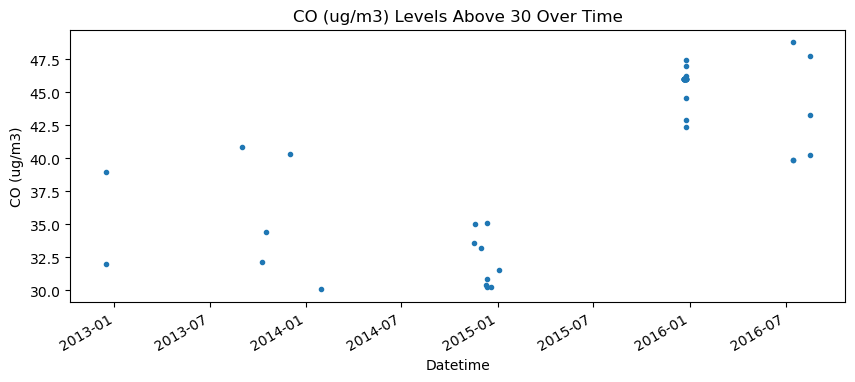

In [111]:
column_name = 'CO (ug/m3)'
analysis_threshold = '30'

df_copy.query('`' + column_name + '` > ' + analysis_threshold)[column_name].plot(style='.', figsize=(10, 4)).set(
    xlabel='Datetime', ylabel=column_name, title=column_name + ' Levels Above ' + analysis_threshold + ' Over Time'
)
plt.show()

Again, we notice just a few extreme points that may be error data points. I will eliminate those.

In [112]:
threshold = 35
column_to_update = "CO (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

Similar method is applied for other columns with outliers "Ozone (ug/m3)", "Xylene (ug/m3)", "WS (m/s)", "BP (mmHg)", "RF (mm)", "SR (W/mt2)"

### Visualizing Outliers for Ozone

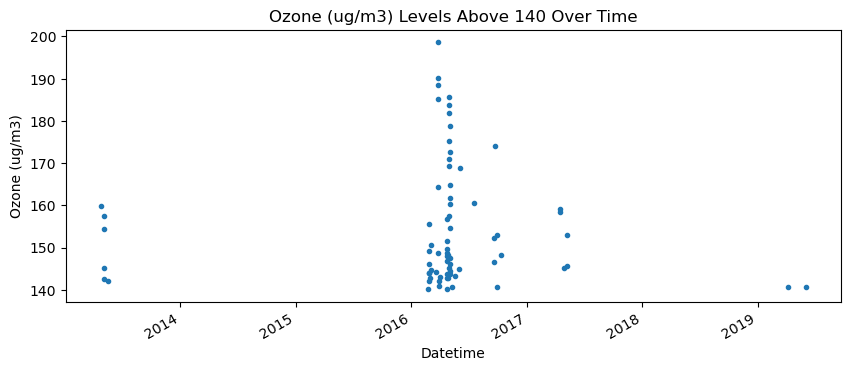

In [115]:
column_name = 'Ozone (ug/m3)'
analysis_threshold = '140'

df_copy.query('`' + column_name + '` > ' + analysis_threshold)[column_name].plot(style='.', figsize=(10, 4)).set(
    xlabel='Datetime', ylabel=column_name, title=column_name + ' Levels Above ' + analysis_threshold + ' Over Time'
)
plt.show()

Here the outliers seem to be limited only around the middle 2016. I will just trim the extreme part of these measurements.

In [116]:
threshold = 160
column_to_update = "Ozone (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

### Visualizing Outliers for Xylene

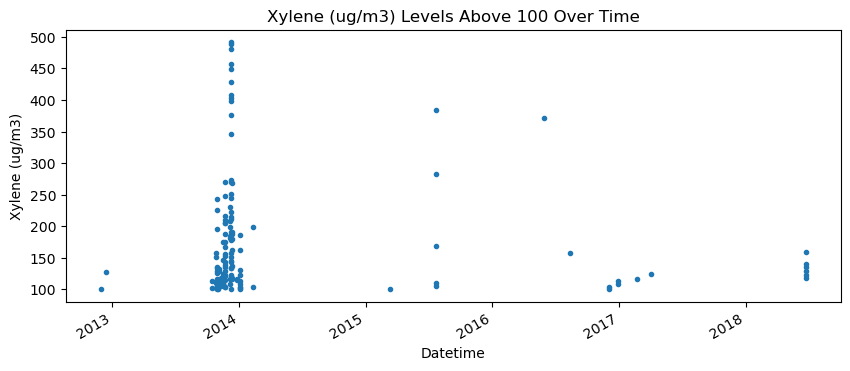

In [117]:
column_name = 'Xylene (ug/m3)'
analysis_threshold = '100'

df_copy.query('`' + column_name + '` > ' + analysis_threshold)[column_name].plot(style='.', figsize=(10, 4)).set(
    xlabel='Datetime', ylabel=column_name, title=column_name + ' Levels Above ' + analysis_threshold + ' Over Time'
)
plt.show()

Again, we notice just a few extreme points that may be error data points. I will eliminate those.

In [118]:
threshold = 300
column_to_update = "Xylene (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

### Visualizing Outliers for WS

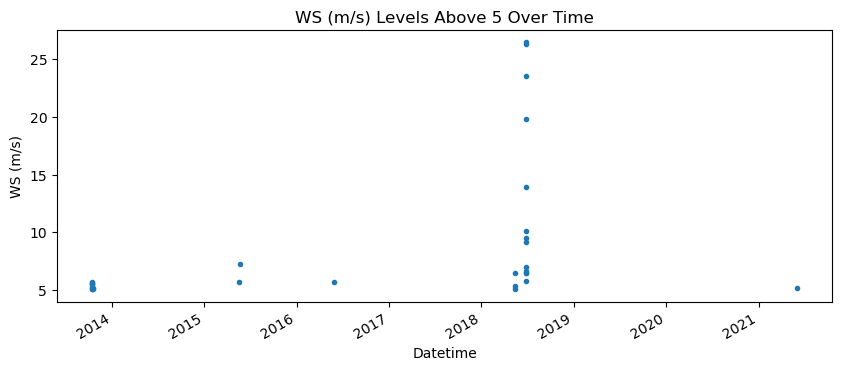

In [67]:
column_name = 'WS (m/s)'
analysis_threshold = '5'

df_copy.query('`' + column_name + '` > ' + analysis_threshold)[column_name].plot(style='.', figsize=(10, 4)).set(
    xlabel='Datetime', ylabel=column_name, title=column_name + ' Levels Above ' + analysis_threshold + ' Over Time'
)
plt.show()

Again, we notice just a few extreme points that may be error data points. I will eliminate those.

In [119]:
threshold = 10
column_to_update = "WS (m/s)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

### Visualizing Outliers for BP

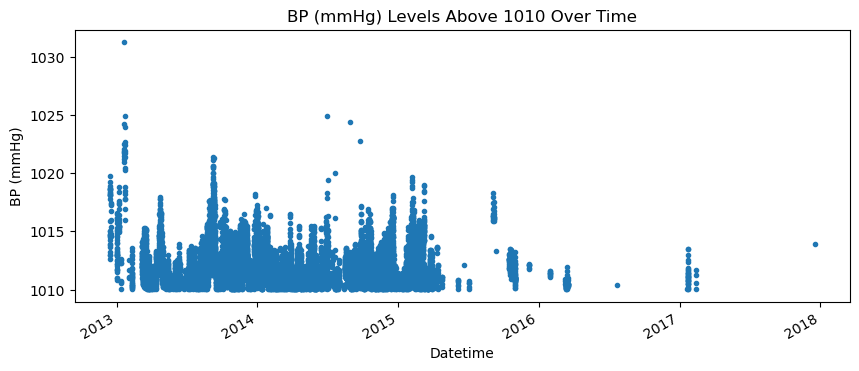

In [121]:
column_name = 'BP (mmHg)'
analysis_threshold = '1010'

df_copy.query('`' + column_name + '` > ' + analysis_threshold)[column_name].plot(style='.', figsize=(10, 4)).set(
    xlabel='Datetime', ylabel=column_name, title=column_name + ' Levels Above ' + analysis_threshold + ' Over Time'
)
plt.show()

Again, we notice just a few extreme points that may be error data points. I will eliminate those.

In [122]:
threshold = 1020
column_to_update = "BP (mmHg)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

### Visualizing Outliers for RF

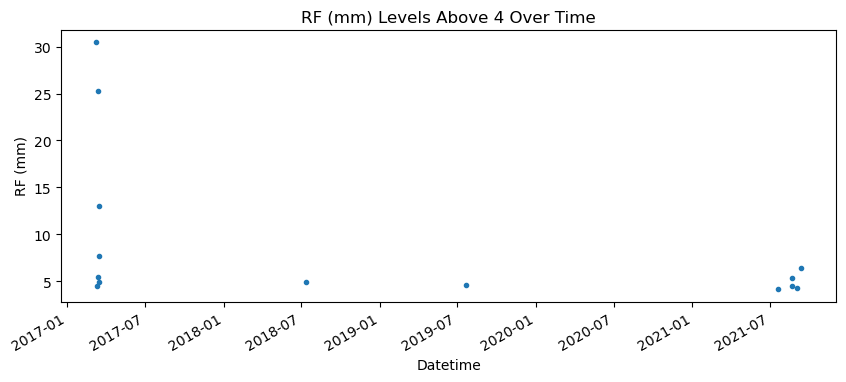

In [123]:
column_name = 'RF (mm)'
analysis_threshold = '4'

df_copy.query('`' + column_name + '` > ' + analysis_threshold)[column_name].plot(style='.', figsize=(10, 4)).set(
    xlabel='Datetime', ylabel=column_name, title=column_name + ' Levels Above ' + analysis_threshold + ' Over Time'
)
plt.show()

Here the outliers seem to be limited only around the begining of 2017. I will just trim the extreme part of these measurements.

In [124]:
threshold = 10
column_to_update = "RF (mm)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

### Visualizing Outliers for SR

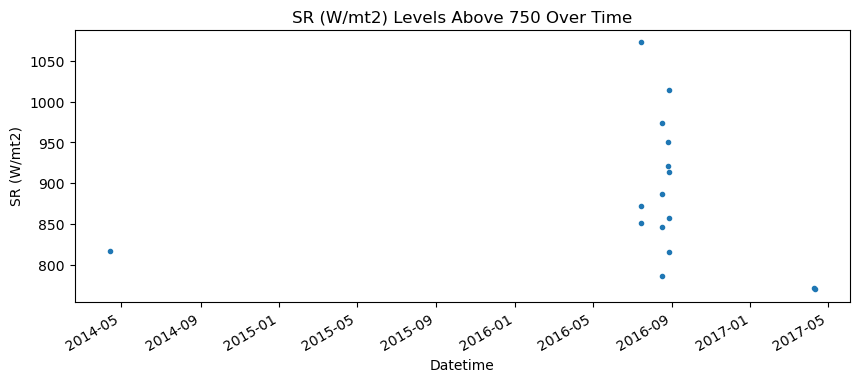

In [125]:
column_name = 'SR (W/mt2)'
analysis_threshold = '750'

df_copy.query('`' + column_name + '` > ' + analysis_threshold)[column_name].plot(style='.', figsize=(10, 4)).set(
    xlabel='Datetime', ylabel=column_name, title=column_name + ' Levels Above ' + analysis_threshold + ' Over Time'
)
plt.show()

Here the outliers seem to be limited only around the middle 2016. I will just trim the extreme part of these measurements.

In [127]:
threshold = 850
column_to_update = "SR (W/mt2)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

## Handling Missing Data (4 Steps Below)

1. Calculate AQI without filling any missing data
2. Iteratively fill missing data of pollutants in the order of pollutant importance, and invoke calculate_aqi for those filled missing records
3. Iteratively fill missing data for rest of the pollutants
4. Fill missing data for remaining records with higher rolling hours data

### 1. Calculate AQI without filling any missing data

In [128]:
# The function is designed to calculate the Air Quality Index (AQI) and perform several related computations, updating the original DataFrame with additional columns representing various AQI-related values. The result is assigned back to the variable df, effectively replacing the original DataFrame with the one modified by the function.
df = calculate_aqi(df)

For each specified air quality parameter (e.g., PM2.5, PM10, SO2, NOx, NH3, CO, Ozone), missing values are filled using a rolling window average over a 3 hours period(`ROLLING_HOURS`). After filling missing values, the `calculate_aqi` function is applied to compute the AQI and related sub-indices.

By doing this we ensure a comprehensive treatment of missing values and provide a consistent AQI calculation across different air quality parameters.

### 2. Iteratively fill missing data of pollutants in the order of pollutant importance, and invoke calculate_aqi for those filled missing records

In [129]:
ROLLING_HOURS = 3

df = fill_missing_with_average(df, ROLLING_HOURS, ['PM2.5 (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['PM10 (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['SO2 (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['NOx (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['NH3 (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['CO (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['Ozone (ug/m3)'])
df = calculate_aqi(df)

#### Data Preprocessing: Handling Missing Values for Non-AQI Related Columns

After handling the missing values in "AQI" column, We focus on handling missing values specifically for columns unrelated to the Air Quality Index (AQI). The steps involve:

1. Creating a list (`non_AQI_related_columns`) containing all columns except 'Datetime', 'StationId', and the AQI-related columns.
2. Applying the `fill_missing_with_average` function to fill missing values in the specified non-AQI related columns using a rolling window average over a defined number of hours (`ROLLING_HOURS`).

This ensures that missing values in non-AQI related data are appropriately handled, contributing to a more robust and complete dataset.

### 3. Iteratively fill missing data for rest of the pollutants and meteorological & weather columns

In [130]:
# Get all columns except datetime stationid
non_AQI_related_columns = df.drop(['Datetime', 'AQI', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'SO2 (ug/m3)', 'NOx (ug/m3)', 'NH3 (ug/m3)', 'CO (ug/m3)', 'Ozone (ug/m3)'], axis=1).columns.tolist()

df = fill_missing_with_average(df, ROLLING_HOURS, non_AQI_related_columns)

del non_AQI_related_columns
del ROLLING_HOURS

In [131]:
df.head()

,Datetime,PM2.5 (ug/m3),PM10 (ug/m3),NH3 (ug/m3),SO2 (ug/m3),Ozone (ug/m3),RH (%),WS (m/s),SR (W/mt2),BP (mmHg),Xylene (ug/m3),AT (degree C),RF (mm),WD (degree),CO (ug/m3),NOx (ug/m3),AQI
0,2012-11-28 00:00:00,202.611667,NaN,84.792500,11.021250,5.956667,58.237143,0.323333,69.714286,877.170000,18.153333,11.155000,NaN,155.900000,5.645000,350.613333,NaN
1,2012-11-28 01:00:00,198.305833,NaN,87.301250,11.515000,6.246667,59.100000,0.340000,69.716429,864.650714,16.845000,10.866250,NaN,128.055000,7.225833,347.215417,NaN
2,2012-11-28 02:00:00,196.347222,NaN,90.343333,12.421250,6.554444,59.288095,0.346667,71.843333,860.452857,15.416667,10.707500,NaN,139.063333,7.095556,321.686111,NaN
3,2012-11-28 03:00:00,199.490556,NaN,92.244167,18.287917,6.793175,57.152381,0.361667,72.253333,852.305714,12.720000,10.390833,NaN,146.500000,6.702222,283.800000,NaN
4,2012-11-28 04:00:00,199.083333,NaN,88.356667,21.301296,6.695119,54.854762,0.394683,71.865238,852.278571,10.306667,10.230000,NaN,150.603333,7.091333,223.706167,NaN


Now let's focus on addressing the remaining missing values in specific columns. The steps involve:

1. Creating a list (`remaining_missing_columns`) containing columns with remaining missing values, such as 'NO2 (ug/m3)', 'PM10 (ug/m3)', and 'SO2 (ug/m3)'.
2. Applying the `fill_missing_with_average` function to fill missing values in the specified remaining columns using a rolling window average over a defined number of hours (`ROLLING_HOURS`).

### 4. Fill missing data for remaining records with interpolation method

In [132]:
# Fill missing values in 'RF (mm)' column with a default value of 0
df['RF (mm)'] = df['RF (mm)'].fillna(0)

# Interpolate missing values for columns excluding specified ones
df.interpolate(method="linear", inplace=True, limit_direction="both")

### Verify any missing data remaining and then prepare data for Export

Data preparation steps before exporting the DataFrame for Exploratory Data Analysis (EDA):

following steps are performed related to handling missing values in the DataFrame:

1. Calculating the count of missing values for each column in the filtered DataFrame.
2. Ordering the columns based on the count of missing values in descending order.

In [133]:
# Get missing value count for each column in the filtered DataFrame
missing_value_counts = df.isnull().sum()

# Order the records by missing value count in descending order
missing_value_counts = missing_value_counts.sort_values(ascending=True)

print(missing_value_counts)

del missing_value_counts

Datetime          0
CO (ug/m3)        0
WD (degree)       0
RF (mm)           0
AT (degree C)     0
Xylene (ug/m3)    0
BP (mmHg)         0
NOx (ug/m3)       0
SR (W/mt2)        0
RH (%)            0
Ozone (ug/m3)     0
SO2 (ug/m3)       0
NH3 (ug/m3)       0
PM10 (ug/m3)      0
PM2.5 (ug/m3)     0
WS (m/s)          0
AQI               0
dtype: int64


In [134]:
# sanity check
df.head()

,Datetime,PM2.5 (ug/m3),PM10 (ug/m3),NH3 (ug/m3),SO2 (ug/m3),Ozone (ug/m3),RH (%),WS (m/s),SR (W/mt2),BP (mmHg),Xylene (ug/m3),AT (degree C),RF (mm),WD (degree),CO (ug/m3),NOx (ug/m3),AQI
0,2012-11-28 00:00:00,202.611667,283.84,84.792500,11.021250,5.956667,58.237143,0.323333,69.714286,877.170000,18.153333,11.155000,0.0,155.900000,5.645000,350.613333,325.0
1,2012-11-28 01:00:00,198.305833,283.84,87.301250,11.515000,6.246667,59.100000,0.340000,69.716429,864.650714,16.845000,10.866250,0.0,128.055000,7.225833,347.215417,325.0
2,2012-11-28 02:00:00,196.347222,283.84,90.343333,12.421250,6.554444,59.288095,0.346667,71.843333,860.452857,15.416667,10.707500,0.0,139.063333,7.095556,321.686111,325.0
3,2012-11-28 03:00:00,199.490556,283.84,92.244167,18.287917,6.793175,57.152381,0.361667,72.253333,852.305714,12.720000,10.390833,0.0,146.500000,6.702222,283.800000,325.0
4,2012-11-28 04:00:00,199.083333,283.84,88.356667,21.301296,6.695119,54.854762,0.394683,71.865238,852.278571,10.306667,10.230000,0.0,150.603333,7.091333,223.706167,325.0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90624 entries, 0 to 90623
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Datetime        90624 non-null  datetime64[ns]
 1   PM2.5 (ug/m3)   90624 non-null  float64       
 2   PM10 (ug/m3)    90624 non-null  float64       
 3   NH3 (ug/m3)     90624 non-null  float64       
 4   SO2 (ug/m3)     90624 non-null  float64       
 5   Ozone (ug/m3)   90624 non-null  float64       
 6   RH (%)          90624 non-null  float64       
 7   WS (m/s)        90624 non-null  float64       
 8   SR (W/mt2)      90624 non-null  float64       
 9   BP (mmHg)       90624 non-null  float64       
 10  Xylene (ug/m3)  90624 non-null  float64       
 11  AT (degree C)   90624 non-null  float64       
 12  RF (mm)         90624 non-null  float64       
 13  WD (degree)     90624 non-null  float64       
 14  CO (ug/m3)      90624 non-null  float64       
 15  NO

## Selected Columns Export

* The provided code snippet selects specific columns from the DataFrame for further analysis or visualization. The selected columns include essential environmental parameters and the Air Quality Index (AQI). These columns are then saved to a CSV file located in the 'data/generated/all_in_one/' directory.
* This step ensures that only the relevant columns are retained for future analyses, making the dataset more manageable and focused on the specific parameters of interest.

In [136]:
# Columns to keep
selected_columns = ["Datetime", "AQI", "PM2.5 (ug/m3)", "PM10 (ug/m3)", "NOx (ug/m3)", "NH3 (ug/m3)", "SO2 (ug/m3)", "CO (ug/m3)", "Ozone (ug/m3)", "Xylene (ug/m3)", "RH (%)", "WS (m/s)", "WD (degree)", "BP (mmHg)", "AT (degree C)", "RF (mm)", "SR (W/mt2)"]

# Create 'generated' folder if not exists
folder_path = 'data/generated/all_in_one/'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save the DataFrame to a CSV file with selected columns
df[selected_columns].to_csv('data/generated/delhi_AQI_hourly.csv', index=False)

**Next Steps:**
To continue the journey to Exploratory Data Analysis(EDA), open the next notebook titled "2_data_exploration(EDA).ipynb" Click [here](../AirQualityPredictor/2_data_exploration(EDA).ipynb) to access the next notebook.